# Task 2

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

2.1 Save your data into a file after it is cleaned in Assignment 8

In [83]:
data = pd.read_csv('cars_cleaned.csv')
data.head(5)

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,US
1,Buick Skylark 320,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,US
2,Plymouth Satellite,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,US
3,AMC Rebel SST,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,US
4,Ford Torino,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,US


In [146]:
data.describe(include='all')

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
count,378,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378
unique,289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,Toyota Corolla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US
freq,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,236
mean,NaN,23.182011,5.431217,189.620370,102.343915,2958.277778,15.520635,76.021164,NaN
std,NaN,8.186451,1.683680,99.195822,34.038100,826.982943,2.461469,3.675797,NaN
min,NaN,0.000000,3.000000,68.000000,46.000000,1613.000000,9.500000,70.000000,NaN
25%,NaN,17.500000,4.000000,105.000000,76.000000,2223.750000,13.925000,73.000000,NaN
50%,NaN,22.300000,4.000000,151.000000,93.000000,2811.000000,15.500000,76.000000,NaN
75%,NaN,29.000000,6.000000,258.000000,120.000000,3573.000000,17.000000,79.000000,NaN


In [84]:
#Handling Null value in origin and other features first
data.isnull().sum()

Car             0
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model           0
Origin          1
dtype: int64

In [87]:
data = data.dropna()
data.isnull().sum()

Car             0
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model           0
Origin          0
dtype: int64

2.1.1 (8 points) Based on Assignment 8 Correlation Matrix, find four features which
have high Pearson's correlation coefficients with Weight. Then, plot the multiple
scatter charts to show relationships between Weight and these features in one
figure. Briefly explain your observation in the plot

<Figure size 432x288 with 0 Axes>

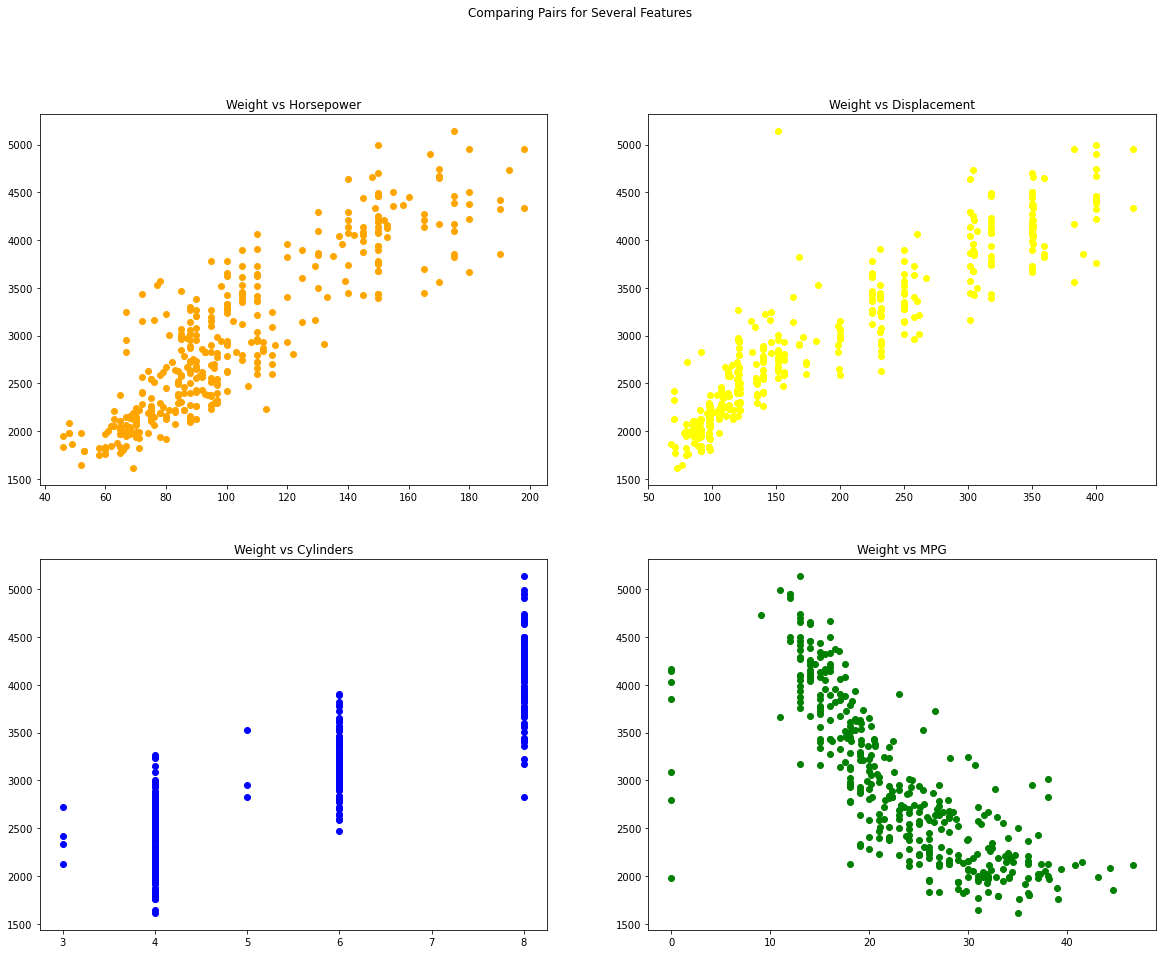

In [88]:
f = plt.figure()    
f, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,15))
f.suptitle('Comparing Pairs for Several Features', fontsize=12)

axes[0][0].scatter(data.Horsepower, data.Weight,c='orange', marker='o')
axes[0][0].set_title('Weight vs Horsepower', fontsize=12)

axes[0][1].scatter(data.Displacement, data.Weight,c='yellow', marker='o')
axes[0][1].set_title('Weight vs Displacement', fontsize=12)

axes[1][0].scatter(data.Cylinders, data.Weight,c='blue', marker='o')
axes[1][0].set_title('Weight vs Cylinders', fontsize=12)

axes[1][1].scatter(data.MPG, data.Weight,c='green', marker='o')
axes[1][1].set_title('Weight vs MPG', fontsize=12)

plt.show()

# 2.1.2 (22 points) Use Simple Linear Regression (LR) to Build a Model to Predict Weight

2.1.2.1 (2 points) Observe the above plots and select ONLY ONE feature to build
a simple LR model to predict Weight and briefly explain why you select
thisfeature

For the Linear Regression Model, we decided to select Horsepower as our predictor variable. We decided on this because the scatter plot clearly shows a strong, positive correlation between the 2 variables.

2.1.2.2 (3 points) Split the dataset into a training set (80%) and a test set (20%)


In [143]:
#Displacement
# y = data['Weight']
# x = data[['Displacement']].values

# print(x.shape)
# print(y.shape)

(378, 1)
(378,)


In [144]:
# x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
# print("Total rows: ", len(data))
# print("Training rows: ", len(x_train))
# print("Testing rows: ", len(x_test))

Total rows:  378
Training rows:  302
Testing rows:  76


In [145]:
# lin_reg = LinearRegression()
# clf = lin_reg.fit(x_train, y_train)
# print("Coefficient: ", clf.coef_)
# print("Y intercept: ", clf.intercept_)

Coefficient:  [7.66132821]
Y intercept:  1504.7423248584594


In [89]:
y = data['Weight']
x = data[['Horsepower']].values

print(x.shape)
print(y.shape)

(378, 1)
(378,)


In [90]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
print("Total rows: ", len(data))
print("Training rows: ", len(x_train))
print("Testing rows: ", len(x_test))

Total rows:  378
Training rows:  302
Testing rows:  76


2.1.2.3 (4 points) Build a LR model to find details (i.e., intercept and slope) of the
relationship between Weight and this feature.

In [91]:
lin_reg = LinearRegression()
clf = lin_reg.fit(x_train, y_train)
print("Coefficient: ", clf.coef_)
print("Y intercept: ", clf.intercept_)

Coefficient:  [20.97799687]
Y intercept:  820.3815403854715


2.1.2.4 (3 points) Use the test set to make prediction and print out Root Mean
Squared Error (RMSE).

In [92]:
predict = lin_reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, predict))
print("Linear Regression RMSE: %f" % (rmse))

Linear Regression RMSE: 346.284746


2.1.2.5 (10 points) Plot the predicted straight line with the test data and briefly
explain your observation in the plot.

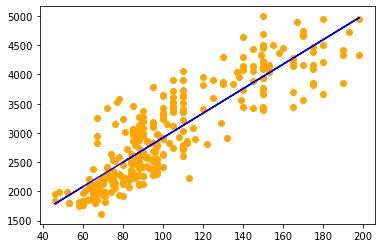

In [93]:
plt.scatter(x_train, y_train,c='orange')
predictions = np.dot(x_train, clf.coef_)

for index in range(len(predictions)):
    predictions[index] = predictions[index] + clf.intercept_
    
plt.plot(x_train, predictions,c='blue')

As we can see in the above graph, there is a strong linear, and positive correlation between the predictor variable Horsepower and the target variable Weight. As the Horsepower of a car increases, so does the Weight of the same

# 2.2 Clustering (20 points)

2.2.1 (5 points) Use K-means Clustering algorithm to find groups between
Horsepower and Weight. Use number of clusters as 3. Plot clustered groups with
scatter charts

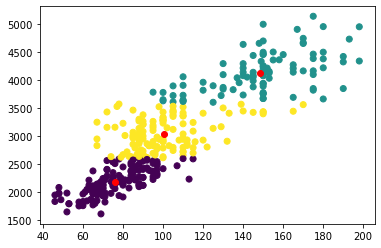

In [94]:
df = DataFrame(data, columns = ['Horsepower', 'Weight'])
kmeans = KMeans(n_clusters = 3).fit(df)
centroids = kmeans.cluster_centers_

plt.scatter(df['Horsepower'], df['Weight'], c = kmeans.labels_.astype(float))
plt.scatter(centroids[:,0], centroids[:,1], c='red')
plt.show()

2.2.2.1 (10 points) Use K-means Clustering algorithm (k=4) to find groups using
different numbers of the features:
▪ 'Cylinders' and 'Displacement'
▪ 'Cylinders', 'Displacement', 'Weight', 'Horsepower', 'MPG'
Then visualize two clustered groups with scatter charts only using Cylinders and
Displacement features.

<Figure size 432x288 with 0 Axes>

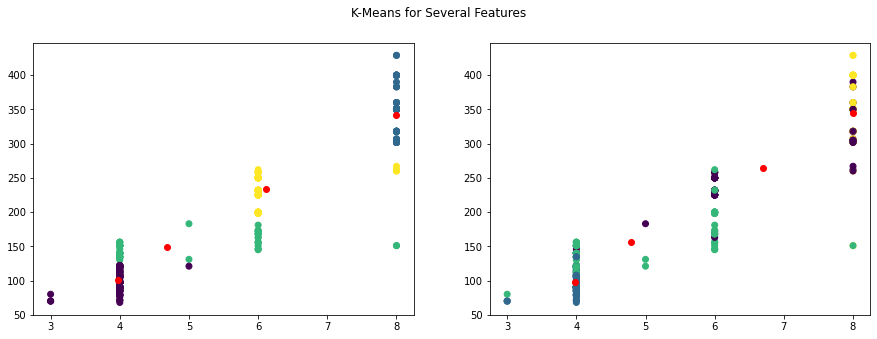

In [95]:
#Cylinders and Displacement
df = DataFrame(data, columns = ['Cylinders', 'Displacement'])
kmeans = KMeans(n_clusters = 4).fit(df)
centroids = kmeans.cluster_centers_

#Cylinders, Displacement, Weight, Horsepower, MPG
df2 = DataFrame(data, columns = ['Cylinders', 'Displacement', 'Weight', 'Horsepower', 'MPG'])
kmeans2 = KMeans(n_clusters = 4).fit(df2)
centroids2 = kmeans2.cluster_centers_


f = plt.figure()    
f, axes = plt.subplots(ncols = 2, figsize = (15,5))
f.suptitle('K-Means for Several Features', fontsize=12)

axes[0].scatter(df['Cylinders'], df['Displacement'], c = kmeans.labels_.astype(float))
axes[0].scatter(centroids[:,0], centroids[:,1], c='red')

axes[1].scatter(df2['Cylinders'], df2['Displacement'], c = kmeans2.labels_.astype(float))
axes[1].scatter(centroids2[:,0], centroids2[:,1], c='red')



plt.show()


2.2.2.2 (5 points) Observe the above plots and compare each other. Explain how
each plot is different from other in terms of cylinders representing those groups.

TODO: EXPLAIN
Difference location of centroids from left to right, right one having a value closer to 7, suggesting some overfitting of the test data

# 2.3 Classification (27 points)


2.3.1.1 (5 points) Use KNN Classifier to classify ‘Origin’ with all numeric features.
Print the model accuracy score and confusion matrix

In [96]:
y = data.iloc[:,-1]
x = data.iloc[:,:-1]

print(x.shape)
print(y.shape)

(378, 8)
(378,)


In [97]:
x.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model
0,Chevrolet Chevelle Malibu,18.0,8.0,307.0,130.0,3504.0,12.0,70.0
1,Buick Skylark 320,15.0,8.0,350.0,165.0,3693.0,11.5,70.0
2,Plymouth Satellite,18.0,8.0,318.0,150.0,3436.0,11.0,70.0
3,AMC Rebel SST,16.0,8.0,304.0,150.0,3433.0,12.0,70.0
4,Ford Torino,17.0,8.0,302.0,140.0,3449.0,10.5,70.0


In [98]:
x = x.drop(['Car'], axis=1)
x.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0


In [99]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
print("Total rows: ", len(data))
print("Training rows: ", len(x_train))
print("Testing rows: ", len(x_test))

Total rows:  378
Training rows:  302
Testing rows:  76


In [100]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [102]:
print('\nModel accuracy score: ', accuracy_score(y_test, pred))
print('\nConfusion Matrix\n', confusion_matrix(y_test, pred))


Model accuracy score:  0.6052631578947368

Confusion Matrix
 [[ 2  7  7]
 [ 6  6  4]
 [ 1  5 38]]


2.3.1.2 (3 points) Observe the correlation matrix. Remove some features with
high correlations (> around 0.9, e.g., Cylinders, weight) to Displacement
and then apply KNN classifier to classify ‘Origin’ with the rest of numeric
features. Print the model accuracy score and confusion matrix.

In [103]:
x = x.drop(['Cylinders'], axis=1)
x.head()

,MPG,Displacement,Horsepower,Weight,Acceleration,Model
0,18.0,307.0,130.0,3504.0,12.0,70.0
1,15.0,350.0,165.0,3693.0,11.5,70.0
2,18.0,318.0,150.0,3436.0,11.0,70.0
3,16.0,304.0,150.0,3433.0,12.0,70.0
4,17.0,302.0,140.0,3449.0,10.5,70.0


In [104]:
x = x.drop(['Weight'], axis=1)
x.head()

,MPG,Displacement,Horsepower,Acceleration,Model
0,18.0,307.0,130.0,12.0,70.0
1,15.0,350.0,165.0,11.5,70.0
2,18.0,318.0,150.0,11.0,70.0
3,16.0,304.0,150.0,12.0,70.0
4,17.0,302.0,140.0,10.5,70.0


In [105]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
print("Total rows: ", len(data))
print("Training rows: ", len(x_train))
print("Testing rows: ", len(x_test))

Total rows:  378
Training rows:  302
Testing rows:  76


In [106]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [107]:
print('\nModel accuracy score: ', accuracy_score(y_test, pred))
print('\nConfusion Matrix\n', confusion_matrix(y_test, pred))


Model accuracy score:  0.8026315789473685

Confusion Matrix
 [[ 4  5  3]
 [ 1 12  2]
 [ 2  2 45]]


2.3.1.3 (2 points) Compare two metrics for 2.3.1.1 and 2.3.1.2. What can you
find? Please explain.

TODO EXPLAIN
Higher correlation when removing higher correlated variables to Displacement (Weight and Cylinders) 

# 2.3.2 (12 points) KNN Classification for ‘Cylinders’

2.3.2.1 (5 points) Use KNN Classifier to classify ‘Cylinders’ with all numeric
features. Print the model accuracy score and confusion matrix

In [128]:
y = data['Cylinders']
x = data[['MPG', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model']]

print(x.shape)
print(y.shape)

(378, 6)
(378,)


In [129]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
print("Total rows: ", len(data))
print("Training rows: ", len(x_train))
print("Testing rows: ", len(x_test))

Total rows:  378
Training rows:  302
Testing rows:  76


In [130]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [131]:
print('\nModel accuracy score: ', accuracy_score(y_test, pred))
print('\nConfusion Matrix\n', confusion_matrix(y_test, pred))


Model accuracy score:  0.8947368421052632

Confusion Matrix
 [[40  0  1  0]
 [ 0  0  1  0]
 [ 2  0 12  1]
 [ 0  0  3 16]]


2.3.2.2 (3 points) Observe the correlation matrix. Selected features with top two
highest correlations with Cylinders (e.g., Displacement, Horsepower) to
classify Cylinders using KNN classifier. Print the model accuracy score and
confusion matrix.

In [132]:
#Using only Displacement and Horsepower (High correlation) to classify Cylinders
y = data['Cylinders']
x = data[['Displacement', 'Horsepower']]

print(x.shape)
print(y.shape)

(378, 2)
(378,)


In [133]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
print("Total rows: ", len(data))
print("Training rows: ", len(x_train))
print("Testing rows: ", len(x_test))

Total rows:  378
Training rows:  302
Testing rows:  76


In [134]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [135]:
print('\nModel accuracy score: ', accuracy_score(y_test, pred))
print('\nConfusion Matrix\n', confusion_matrix(y_test, pred))


Model accuracy score:  0.9605263157894737

Confusion Matrix
 [[41  0  0  0]
 [ 1  0  0  0]
 [ 2  0 15  0]
 [ 0  0  0 17]]


2.3.2.3 (2 points) Selected a few features with lower correlations with Cylinders
(e.g., Acceleration, Model) to classify Cylinders using KNN classifier. Print
the model accuracy score and confusion matrix

In [136]:
#Using only Acceleration and Model (low correlation) to classify Cylinders
y = data['Cylinders']
x = data[['Acceleration', 'Model']]

print(x.shape)
print(y.shape)

(378, 2)
(378,)


In [137]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
print("Total rows: ", len(data))
print("Training rows: ", len(x_train))
print("Testing rows: ", len(x_test))

Total rows:  378
Training rows:  302
Testing rows:  76


In [138]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [139]:
print('\nModel accuracy score: ', accuracy_score(y_test, pred))
print('\nConfusion Matrix\n', confusion_matrix(y_test, pred))


Model accuracy score:  0.6052631578947368

Confusion Matrix
 [[ 0  0  0  0  0]
 [ 1 29  1 10  5]
 [ 0  0  0  0  0]
 [ 1  4  0  4  3]
 [ 0  4  0  1 13]]


2.3.2.4 (2 points) Compare two metrics for 2.3.2.1, 2.3.2.2, and 2.3.2.3. What
can you find? Please explain.

TODO EXPLAIN
Higher correlated, more accurate
Less correlated, less accurate
More variables, in the middle in terms of accuracy

2.3.3 (5 points) Compare with 2.3.1 and 2.3.2. What can you find? Please clearly
explain in the notebook.

TODO EXPLAIN
Origin vs Cylinders - Cylinders is easier to classify since there is a clear correlation with certain variables